In [12]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path

In [13]:
ACS =  DataLoaders.ACSData(2016,'block_group')

In [14]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [16]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [17]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

/home/kelsonss/Documents/GitHub/rcp2/src/models/ModelClasses.py:169: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Predicting 2017:
[[147006  44455]
 [  2487   8835]]
0.8595566016456833
              precision    recall  f1-score   support

       False       0.98      0.77      0.86    191461
        True       0.17      0.78      0.27     11322

    accuracy                           0.77    202783
   macro avg       0.57      0.77      0.57    202783
weighted avg       0.94      0.77      0.83    202783

7.995516328457793
Feature ranking:
1. Max (0.385028)
2. Median (0.154249)
3. pct_alt_heat (0.088281)
4. house_pct_live_alone (0.079518)
5. race_pct_black_or_amind (0.075907)
6. house_yr_pct_before_1960 (0.073211)
7. inc_pct_poverty (0.072736)
8. did_not_work_past_12_mo (0.071069)


In [18]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

/home/kelsonss/Documents/GitHub/rcp2/src/models/ModelClasses.py:169: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Predicting 2017:
[[147895  51155]
 [  1032   2701]]
0.8185501491043077
              precision    recall  f1-score   support

       False       0.99      0.74      0.85    199050
        True       0.05      0.72      0.09      3733

    accuracy                           0.74    202783
   macro avg       0.52      0.73      0.47    202783
weighted avg       0.98      0.74      0.84    202783

8.888891214390483
Feature ranking:
1. Median (0.313726)
2. Max (0.212111)
3. did_not_work_past_12_mo (0.082153)
4. race_pct_black_or_amind (0.080522)
5. pct_alt_heat (0.079632)
6. house_yr_pct_before_1960 (0.078414)
7. inc_pct_poverty (0.077514)
8. house_pct_live_alone (0.075928)


In [19]:
ARC =  DataLoaders.ARCPData()

In [62]:
ARC.data

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534591,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260072,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260072,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260072,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260072,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [21]:
Smoke = SmokeAlarmModels()

-----Training_Performance------
97.71551024696026
Test RMSE: 9.885115590976175
Test MAE: 7.289827084176816


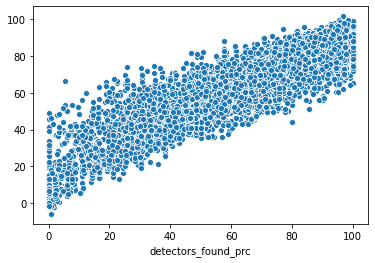

-----Test Performance ----- 
Test RMSE: 15.092299143300814
Test MAE: 11.174150441240043


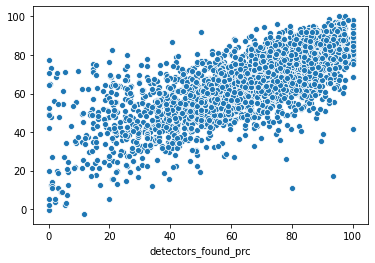

Test Correlation: (0.7272718110945489, 0.0)
Test R-squared: 0.5284797244748438

 Feature ranking:
1. county_detectors_found_prc (0.408470)
2. state_detectors_found_prc (0.230443)
3. house_yr_pct_before_1960 (0.066066)
4. Population Density (per square mile), 2010 (0.065238)
5. race_pct_black_or_amind (0.060004)
6. inc_pct_poverty (0.049959)
7. pct_alt_heat (0.044641)
8. did_not_work_past_12_mo (0.039248)
9. house_pct_live_alone (0.035932)


In [22]:
smoke_prediction = Smoke.trainModels(ARC,ACS,ACS_cols_to_use,utils.DATA['data'])

In [54]:
out = NFIRS.fires.copy()
out.columns =  'fires_per_1K_pop_' + out.columns

In [55]:
out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,0]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,0]


In [ ]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols]


In [56]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [58]:
out['smoke_detector_risk_score'] =  1 - out['detectors_predicted'] / 100

In [59]:
out['CombinedRiskScore'] = ( max(out['fire_severity_risk_score'] 
                          + out['fire_propensity_risk_score']) 
                          + out['smoke_detector_risk_score']
                            ) * 100       

In [60]:
out.index = '#_' + out.index
out.to_csv(utils.DATA['model-outputs'] / 'CombinedModels.csv')

In [ ]:
# alternate risk score ideas 

#out['CombinedRiskScore'] = (out[["fire_severity_risk_score", "fire_propensity_risk_score"]].max(axis=1) + out['smoke_detector_risk_score'])*100